#### 우주 함선에서 살아남을 확률
 - 데이터셋 : spaceship
 - feature : 
 - target : Transported
 - 알고리즘 : Extratrees

[1] 모듈 로딩 및 데이터 준비

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
spaceDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\MachineLearning\data\spaceship\train.csv')
testDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\MachineLearning\data\spaceship\test.csv')

In [92]:
# 형준님 전처리 된 거 가져오기

# 전부 중복인 값, 한개라도 중복인값 체크
# 대부분 각 컬럼별 결측치, 삭제아닌 최대한 채우기로 결정
spaceDF.isna().all(axis=1).sum(), spaceDF.isna().any(axis=1).sum()


# 모든 금액이 결측치인 데이터 체크 없으므로 개인별 총 지불한 금액 평균치를 대입하기로 결정
space_cols =spaceDF.columns[[7,8,9,10,11]].to_list()
spaceDF[space_cols].isna().all(axis=1).sum()


# 개인별 지불한 금액 평균치로 지정 대입
for col in space_cols:
    pId = spaceDF.loc[spaceDF[col].isna(),'PassengerId']
    for idx in pId:
        p = spaceDF['PassengerId'] == idx
        spaceDF.loc[p,col] = spaceDF.loc[p,space_cols].mean(axis=1)
        print(spaceDF.loc[p,col])


spaceDF.drop(index=spaceDF[spaceDF['Cabin'].isna()].index,inplace=True)
spaceDF.loc[spaceDF['Age'].isna(),'Age'] = spaceDF['Age'].mean()

vipCut = spaceDF.loc[spaceDF['VIP'] == True,space_cols].mean(axis=1).mean()

vipidx = spaceDF.loc[spaceDF['VIP'].isna(),'PassengerId']
# VIP 멤버들이 평균적으로 사용한 금액이상으로 썻다면 VIP로 대입
for idx in vipidx:
    h_m = spaceDF.loc[spaceDF['PassengerId'] == idx,space_cols].mean(axis=1).values[0]
    if h_m >= vipCut:
        spaceDF.loc[spaceDF['PassengerId'] == idx,'VIP'] = True
    else:
        spaceDF.loc[spaceDF['PassengerId'] == idx,'VIP'] = False

# 안쓰는 컬럼 삭제
spaceDF.drop(columns='PassengerId',inplace=True)
spaceDF.drop(columns='Name',inplace=True)

25    0.0
Name: RoomService, dtype: float64
35    685.0
Name: RoomService, dtype: float64
83    0.0
Name: RoomService, dtype: float64
132    24.25
Name: RoomService, dtype: float64
170    270.0
Name: RoomService, dtype: float64
220    222.0
Name: RoomService, dtype: float64
233    0.0
Name: RoomService, dtype: float64
280    1236.75
Name: RoomService, dtype: float64
319    473.5
Name: RoomService, dtype: float64
368    430.0
Name: RoomService, dtype: float64
400    0.0
Name: RoomService, dtype: float64
401    1918.5
Name: RoomService, dtype: float64
444    73.75
Name: RoomService, dtype: float64
448    83.0
Name: RoomService, dtype: float64
550    58.25
Name: RoomService, dtype: float64
568    196.75
Name: RoomService, dtype: float64
637    1776.0
Name: RoomService, dtype: float64
646    189.0
Name: RoomService, dtype: float64
820    663.25
Name: RoomService, dtype: float64
889    0.0
Name: RoomService, dtype: float64
905    10.0
Name: RoomService, dtype: float64
908    1.333333
Name: 

[1-1] 데이터 정제(인코딩)

In [93]:
# object 타입 데이터 원-핫 인코딩
ex_featureDF = spaceDF[spaceDF.columns[:-1]]
targetSR = spaceDF[spaceDF.columns[-1]]

ex_featureDF

floatDF = ex_featureDF[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
objDF = ex_featureDF[['HomePlanet','CryoSleep','Destination','VIP']]

In [94]:
# 원-핫인코딩 - feature
objDF_ohe = pd.get_dummies(objDF, columns=objDF.columns)
objDF_ohe = objDF_ohe.applymap(lambda x: 1 if x is True else (0 if x is False else x))
objDF_ohe.isnull().sum()

HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
dtype: int64

In [95]:
print(objDF_ohe.shape, floatDF.shape)
objDF_ohe.astype('float64')

(8494, 10) (8494, 6)


,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [96]:
# 인코딩 완
featureDF_ohe = pd.concat([floatDF,objDF_ohe],axis=1)
featureDF_ohe

targetSR_ohe = targetSR.astype('float64')
targetSR_ohe

## 인코딩 결과
# featureDF_ohe
# targetSR_ohe

print(featureDF_ohe.shape, targetSR_ohe.shape)

(8494, 16) (8494,)


In [97]:
featureDF_ohe.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
dtype: int64

[2] 학습 데이터셋 분리 및 학습

In [98]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF_ohe,targetSR_ohe,
                                                    stratify=targetSR_ohe,
                                                    random_state=10,
                                                    )

In [99]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

X_train.isna().sum()

X_train : (6370, 16), y_train : (6370,)
X_test : (2124, 16), y_test : (2124,)


Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
dtype: int64

[3] 학습 진행

In [100]:
# 모델 임포트
from sklearn.ensemble import ExtraTreesClassifier

# 인스턴스 객체 생성

Ex_model = ExtraTreesClassifier()

# 학습

Ex_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [101]:
# 모델 파라미터
print(f'classes_ : {Ex_model.classes_}')
print(f'n_classes_ : {Ex_model.n_classes_}개')
print(f'feature_names_in_ : {Ex_model.feature_names_in_}')
print(f'n_features_in_ : {Ex_model.n_features_in_}개')
print(f'feature_importances_ : {Ex_model.feature_importances_}')

classes_ : [0. 1.]
n_classes_ : 2개
feature_names_in_ : ['Age' 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck'
 'HomePlanet_Earth' 'HomePlanet_Europa' 'HomePlanet_Mars'
 'CryoSleep_False' 'CryoSleep_True' 'Destination_55 Cancri e'
 'Destination_PSO J318.5-22' 'Destination_TRAPPIST-1e' 'VIP_False'
 'VIP_True']
n_features_in_ : 16개
feature_importances_ : [0.16547511 0.09654746 0.10256585 0.09566202 0.11651059 0.10891257
 0.0274549  0.02055125 0.00993313 0.11894429 0.11563731 0.00673766
 0.00462949 0.00706542 0.00156532 0.00180764]


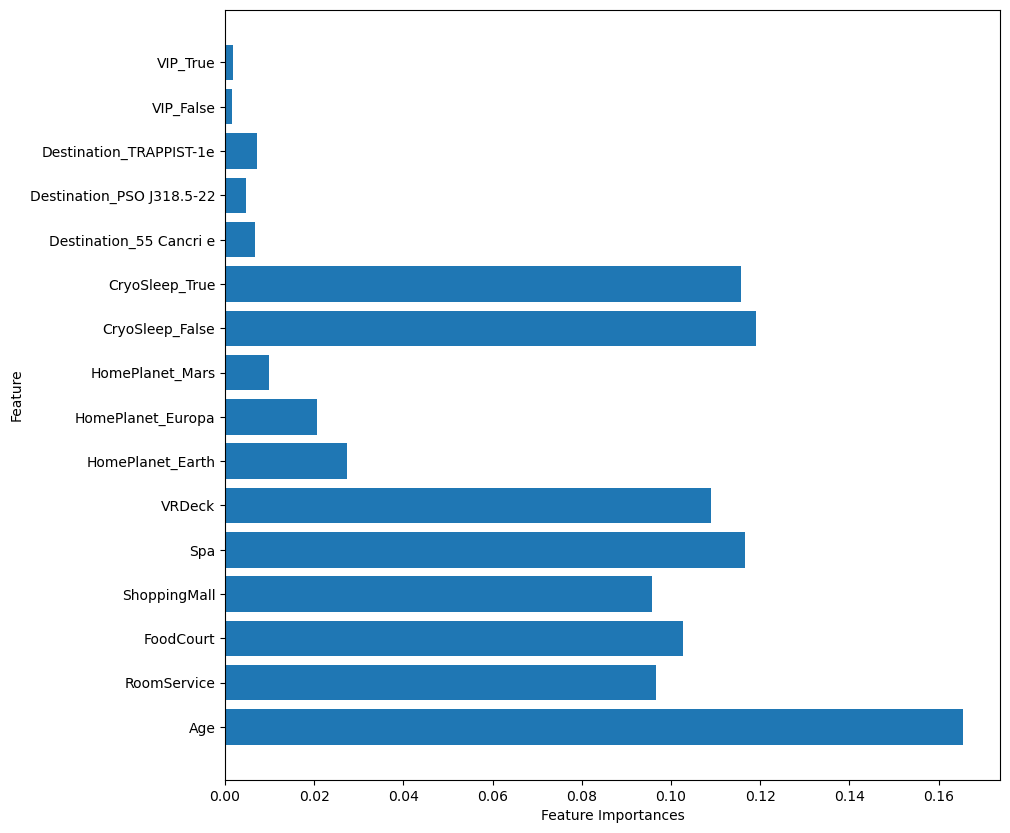

In [102]:
plt.figure(figsize=(10,10))
plt.barh(range(Ex_model.n_features_in_),Ex_model.feature_importances_ ,align='center')
plt.yticks(np.arange(Ex_model.n_features_in_),Ex_model.feature_names_in_)
plt.xlabel('Feature Importances')
plt.ylabel('Feature')
plt.show()

[4] 성능 평가

In [103]:
train_score = Ex_model.score(X_train,y_train)
test_score = Ex_model.score(X_test,y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.9375196232339089, test_score : 0.7740112994350282


train_score와 test_score간의 차이가 너무 심해 튜닝 필요
  * 트리 개수 조정
  * max_depth와 min_samples_leaf 조정
  * RandomizedSearchCV

[5] 튜닝

In [104]:
# Extratreesclassfiler 하이퍼 파라미터 설정
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth':range(2,20),
          'min_samples_leaf':range(2,30),
          'min_samples_split':range(2,30),
          'n_estimators':[100,200,300,400,500],
          'random_state' :[5,10,15,20,25,30]      
          }

searchCV = RandomizedSearchCV(Ex_model, param_distributions=params,
                              n_iter=50,
                              verbose=5,
                              )

searchCV.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=16, min_samples_leaf=27, min_samples_split=6, n_estimators=400, random_state=5;, score=0.743 total time=   0.5s
[CV 2/5] END max_depth=16, min_samples_leaf=27, min_samples_split=6, n_estimators=400, random_state=5;, score=0.754 total time=   0.5s
[CV 3/5] END max_depth=16, min_samples_leaf=27, min_samples_split=6, n_estimators=400, random_state=5;, score=0.746 total time=   0.5s
[CV 4/5] END max_depth=16, min_samples_leaf=27, min_samples_split=6, n_estimators=400, random_state=5;, score=0.733 total time=   0.5s
[CV 5/5] END max_depth=16, min_samples_leaf=27, min_samples_split=6, n_estimators=400, random_state=5;, score=0.749 total time=   0.5s
[CV 1/5] END max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=200, random_state=30;, score=0.775 total time=   0.3s
[CV 2/5] END max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=200, random_state=30;, score=0.768 total time= 

RandomizedSearchCV(estimator=ExtraTreesClassifier(), n_iter=50,
                   param_distributions={'max_depth': range(2, 20),
                                        'min_samples_leaf': range(2, 30),
                                        'min_samples_split': range(2, 30),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'random_state': [5, 10, 15, 20, 25,
                                                         30]},
                   verbose=5)

In [105]:
print(f'searchCV.best_score : {searchCV.best_score_}')
print(f'searchCV.best_params_ : {searchCV.best_params_}')
print(f'searchCV.best_estimator_ : {searchCV.best_estimator_}')
cv_resulDF = pd.DataFrame(searchCV.cv_results_)
print('')



searchCV.best_score : 0.7736263736263735
searchCV.best_params_ : {'random_state': 30, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 17}
searchCV.best_estimator_ : ExtraTreesClassifier(max_depth=17, min_samples_leaf=4, min_samples_split=4,
                     n_estimators=200, random_state=30)


[6] 예측 수행

In [106]:
from sklearn.metrics import classification_report

best_model = searchCV.best_estimator_

# 테스트 데이터에 대한 예측
pred = best_model.predict(X_test)

# 성능지표 출력
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79      1054
         1.0       0.82      0.71      0.76      1070

    accuracy                           0.78      2124
   macro avg       0.78      0.78      0.78      2124
weighted avg       0.78      0.78      0.78      2124

